C:\Users\Peter\AppData\Local\Temp\ipykernel_22448\1926732429.py:7: DtypeWarning: Columns (631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Peter\AppData\Local\Temp\ipykernel_22448\1926732429.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='race_group', y='aging_rate', data=df, inner='box', palette='Set2',


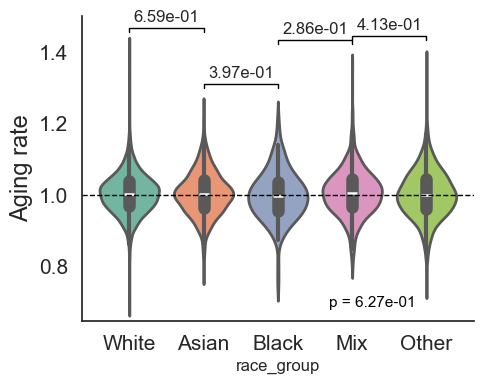

In [ ]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Load dataset containing protein, metabolite, population, and age data
file_path = '../data/4.300_all_prot+met+pop+diea+age.csv'
df = pd.read_csv(file_path)

# Define mapping for race categories (UK Biobank coding to readable labels)
race_mapping = {
    1001: 'White', 2001: 'White', 3001: 'White', 4001: 'White',
    1002: 'Mix', 2002: 'Mix', 3002: 'Mix', 4002: 'Mix',
    1003: 'Asian', 2003: 'Asian', 3003: 'Asian', 4003: 'Asian',
    2004: 'Black', 3004: 'Black'
}

# Create new column with mapped race groups
df['race_group'] = df['21000-0.0'].apply(lambda x: race_mapping.get(x, 'Other'))

# Set Seaborn style for clean visualization
sns.set(style="white")

# Initialize figure with specified dimensions (width, height in inches)
fig, ax = plt.subplots(figsize=(5, 4))

# Define order for x-axis categories
ordered_race_groups = ['White', 'Asian', 'Black', 'Mix', 'Other']

# Create violin plot with box plots inside
sns.violinplot(x='race_group', y='aging_rate', data=df, inner='box', palette='Set2',
               linewidth=2, ax=ax, order=ordered_race_groups)

# Configure y-axis label
ax.set_ylabel('Aging rate', fontsize=17)

# Set y-axis limits to focus on relevant range
ax.set_ylim(0.65, 1.5)

# Customize tick marks
ax.tick_params(axis='x', which='both', length=8, width=2, direction='in', pad=10, labelsize=15)
ax.tick_params(axis='y', which='both', length=8, width=2, direction='in', pad=10, labelsize=15)
ax.minorticks_on()  # Enable minor ticks
ax.tick_params(axis='both', which='minor', length=4, width=1)

# Add reference line at aging rate = 1.0 (normal aging)
plt.axhline(y=1.0, color='black', linestyle='--', linewidth=1)

# Perform pairwise t-tests between adjacent groups and annotate p-values
spacing = 0.02  # Vertical spacing between annotations
k = 0   # Counter for positioning annotations
for i in range(len(ordered_race_groups) - 1):
    group1 = ordered_race_groups[i]
    group2 = ordered_race_groups[i + 1]

    # Extract aging rates for both groups
    group1_data = df[df['race_group'] == group1]['aging_rate']
    group2_data = df[df['race_group'] == group2]['aging_rate']

    # Perform independent t-test
    stat, p_value = stats.ttest_ind(group1_data, group2_data)

    # Determine positions for significance bracket
    x1, x2 = i, i + 1
    y_max = max(group1_data.max(), group2_data.max())
    y_base = y_max + 0.05

    # Position annotations differently based on counter
    if k == 0:
        # First comparison - lower position
        ax.plot([x1, x1, x2, x2], [y_base - 0.02, y_base + spacing - 0.03, y_base + spacing - 0.03, y_base - 0.02], color='black', lw=1)
        ax.text((x1 + x2) / 2, y_base + spacing - 0.02, f'{p_value:.2e}', ha='center', va='bottom', fontsize=12)
    elif k == 3:
        ax.plot([x1, x1, x2, x2], [y_base + 0.02, y_base + spacing + 0.01, y_base + spacing + 0.01, y_base + 0.02], color='black', lw=1)
        ax.text((x1 + x2) / 2, y_base + spacing + 0.02, f'{p_value:.2e}', ha='center', va='bottom', fontsize=12)
    else:
        ax.plot([x1, x1, x2, x2], [y_base + 0.01, y_base + spacing, y_base + spacing, y_base + 0.01], color='black', lw=1)
        ax.text((x1 + x2) / 2, y_base + spacing + 0.01, f'{p_value:.2e}', ha='center', va='bottom', fontsize=12)
    k += 1

# Perform one-way ANOVA across all groups
anova_groups = [df[df['race_group'] == g]['aging_rate'] for g in ordered_race_groups if not df[df['race_group'] == g].empty]
f_stat, p_anova = stats.f_oneway(*anova_groups)

# Add ANOVA p-value annotation in upper right corner
ax.text(0.85, 0.08, f'p = {p_anova:.2e}', transform=ax.transAxes,
        ha='right', va='top', fontsize=11, color='black')

# Remove top and right spines for cleaner look
sns.despine(top=True, right=True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()